# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Datos_Meteorológicos_Arg_2023.csv')
df.tail()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3
1824,31/12/2023,Tucuman,15,10,0.0,30.0,49.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [6]:
ciudades = list(df['Ciudad'].unique())
meses = list(df['Fecha'].dt.month_name(locale='es_ES').unique())

In [7]:
def ciudad_mes():
    ciudad = ''
    opcion = 'x'
    mes = 'y'
    grafico = 'z'
    for i in range(len(ciudades)):
        print(f'[{i+1}]- {ciudades[i]}')
    while not opcion.isnumeric() or int(opcion) not in range(1, len(ciudades)+1):
        opcion = input('Selecciona La Ciudad que deseas consultar: ')
    if opcion == '1':
        ciudad = ciudades[0]
    elif opcion == '2':
        ciudad = ciudades[1]
    elif opcion == '3':
        ciudad = ciudades[2]
    elif opcion == '4':
        ciudad = ciudades[3]
    else: 
        ciudad = ciudades[4]
    
    while not mes.isnumeric() or int(mes) not in range(1, len(meses)+1):
        for i in range(len(meses)):
            print(f'[{i+1}]- {meses[i]}')
        mes = input('Selecciona el mes del año a consultar: ')
    while not grafico.isnumeric() or int(grafico) not in range(1,3):
        print('Selecciona un tipo de Grafico que quieras visualizar:')
        print('[1]- Grafico de Lineas\n[2]- Grafico de Barras')
        grafico = input()
        
    return ciudad, mes, grafico

In [8]:
def make_plot(city_name, month):
    data = df[(df['Ciudad'] == city_name) & (df['Fecha'].dt.month == int(month))]
    plt.figure(figsize=(10, 6))
    plt.plot(data['Fecha'], data['Temperatura Maxima'], color='red', label='Maxima')
    plt.plot(data['Fecha'], data['Temperatura Minima'], color='blue', label='Minima')
    plt.fill_between(data['Fecha'], data['Temperatura Minima'], data['Temperatura Maxima'], color='gray', alpha=0.2 )

    plt.xticks(rotation=45)
    plt.title(f'Temperatura Maxima y Minima de {city_name} en el mes de {meses[int(month)-1]}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura °C')
    plt.legend()
    plt.show()
    

In [9]:
def make_plot_2(city_name, month):
    data = df[(df['Ciudad'] == city_name) & (df['Fecha'].dt.month == int(month))]
    plt.figure(figsize=(10, 6))
    plt.bar(data['Fecha'], data['Temperatura Maxima'], color='red', label='Maxima', alpha=0.5)
    plt.bar(data['Fecha'], data['Temperatura Minima'], color='blue', label='Minima', alpha=0.7)
   
    plt.xticks(rotation=45)
    plt.title(f'Temperatura Maxima y Minima de {city_name} en el mes de {meses[int(month)-1]}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura °C')
    plt.ylim(-5, 40)
    plt.legend()
    plt.show()

In [10]:
def inicio():
    consultar = True
    choice = 'x'
    while consultar:
        city, month_, visualizacion = ciudad_mes()
        if visualizacion == '1':
            make_plot(city, month_)
        elif visualizacion == '2':
            make_plot_2(city, month_)
              
        while choice != 'S' or choice != 'N':
            choice = input('Desea consultar otra ciudad (S)/(N): ').upper()
            if choice == 'S':
                break
            elif choice == 'N':
                consultar = False
                break

[1]- Buenos Aires
[2]- Cordoba
[3]- Rosario
[4]- Mendoza
[5]- Tucuman
[1]- Enero
[2]- Febrero
[3]- Marzo
[4]- Abril
[5]- Mayo
[6]- Junio
[7]- Julio
[8]- Agosto
[9]- Septiembre
[10]- Octubre
[11]- Noviembre
[12]- Diciembre
Selecciona un tipo de Grafico que quieras visualizar:
[1]- Grafico de Lineas
[2]- Grafico de Barras


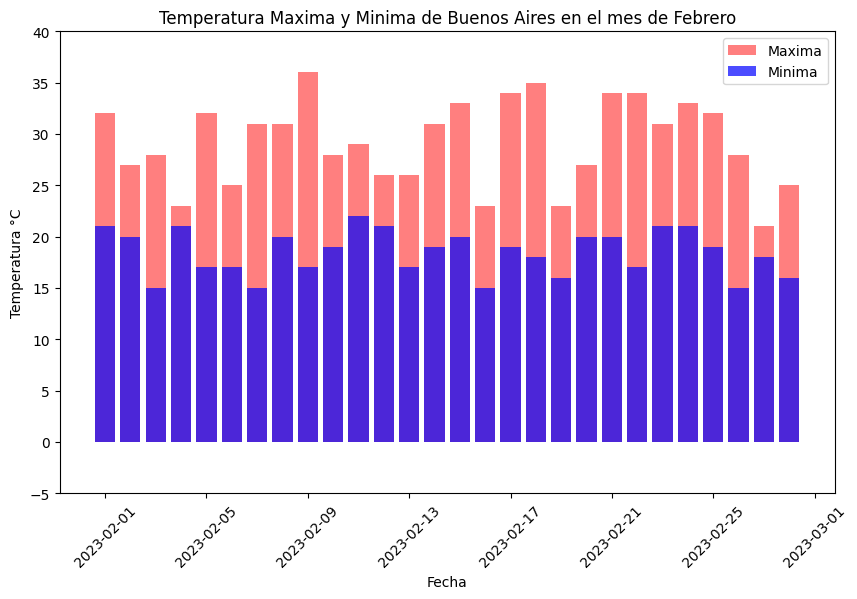

[1]- Buenos Aires
[2]- Cordoba
[3]- Rosario
[4]- Mendoza
[5]- Tucuman
[1]- Enero
[2]- Febrero
[3]- Marzo
[4]- Abril
[5]- Mayo
[6]- Junio
[7]- Julio
[8]- Agosto
[9]- Septiembre
[10]- Octubre
[11]- Noviembre
[12]- Diciembre
Selecciona un tipo de Grafico que quieras visualizar:
[1]- Grafico de Lineas
[2]- Grafico de Barras


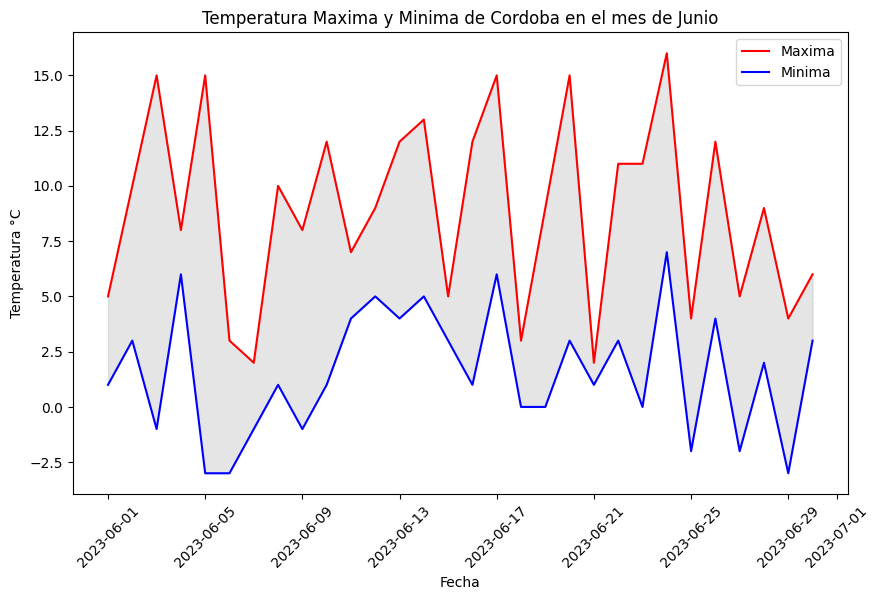

In [11]:
inicio()